In [ ]:
pip install requests pandas numpy tensorflow scikit-learn matplotlib


In [ ]:
pip install pandas numpy scikit-learn matplotlib

In [1]:
from google.colab import files
uploaded = files.upload()

Saving seoul_housing.csv to seoul_housing.csv


RMSE: 6354.142119101506
R^2: 0.9722814603316602


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


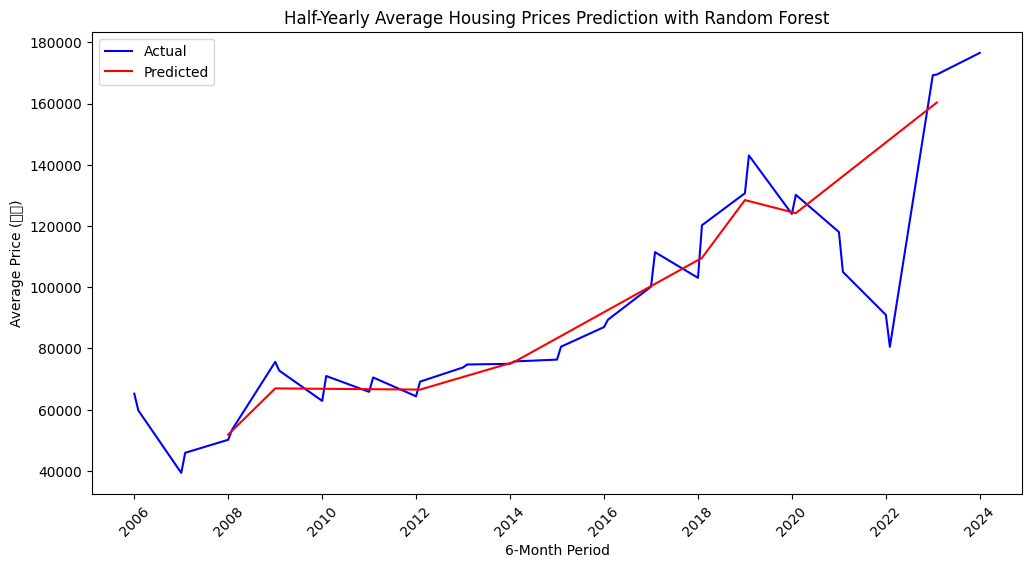

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 로드
file_path = 'seoul_housing.csv'
df = pd.read_csv(file_path, encoding='euc-kr', low_memory=False)

# 필요한 컬럼의 결측치 제거
df = df.dropna(subset=['건물면적(㎡)', '건축년도', '층', '물건금액(만원)', '계약일'])

# 계약 연도와 계약 월 추출
df['계약연도'] = df['계약일'].apply(lambda x: int(str(x)[:4]))
df['계약월'] = df['계약일'].apply(lambda x: int(str(x)[4:6]))

# 반년 단위로 묶기
df['계약반년'] = df['계약연도'].astype(str) + '-' + ((df['계약월'] - 1) // 6 + 1).astype(str)

# 반년 단위 평균 물건금액 계산
half_yearly_avg_price = df.groupby('계약반년')['물건금액(만원)'].mean().reset_index()

# 건물면적 정규화
scaler = MinMaxScaler()
df['건물면적(㎡)'] = scaler.fit_transform(df[['건물면적(㎡)']])

# 반년 단위 평균 건물면적 계산 
half_yearly_avg_size = df.groupby('계약반년')['건물면적(㎡)'].mean().reset_index()

# X와 y 설정
X = pd.to_datetime(half_yearly_avg_price['계약반년'])
y = half_yearly_avg_price['물건금액(만원)']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train.values.reshape(-1, 1), y_train)

# 예측
y_pred = model.predict(X_test.values.reshape(-1, 1))

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'b-', label='Actual')
plt.plot(X_test.sort_values(), y_pred[np.argsort(X_test)], 'r-', label='Predicted')
plt.xlabel("6-Month Period")
plt.ylabel("Average Price (만원)")
plt.title("Half-Yearly Average Housing Prices Prediction with Random Forest")
plt.legend()
plt.xticks(rotation=45)
plt.show()
